# Crop Classification through Deep Learning
In agriculture, the precise recommendation of crops is pivotal in ensuring optimal yield and sustainability. As farmers and agricultural experts delve deeper into data-driven approaches, the significance of leveraging comprehensive datasets, particularly those about soil composition, becomes increasingly evident.

## 1. Problem
> Classifying the crops using Deep learning.

## 2. Dataset
The dataset under consideration embodies a wealth of information encompassing key factors such as Nitrogen, Phosphorus, and Potassium levels, alongside environmental variables like Temperature, Humidity, pH_Value, and Rainfall. 

## 3. Evaluation
1. Classification Report
2. Confusion Matrix
3. Accuracy Score

## 4. Features 
- Nitrogen	
- Phosphorus	
- Potassium	
- Temperature	
- Humidity	
- pH_Value	
- Rainfall	
- Crop

## Preparing the tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization


import warnings
warnings.filterwarnings("ignore")

## Load the Dataset

In [2]:
df = pd.read_csv('Crop_Recommendation.csv')
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
# Check for any duplicates
df.duplicated().sum()

0

In [8]:
# Check for any missing values
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

## Exploratory Data Analysis

Do some EDA and uncover the trends in the dataset

In [9]:
df['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

<Axes: ylabel='Crop'>

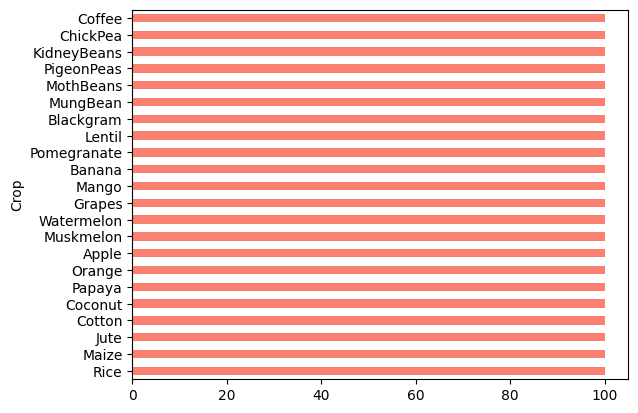

In [14]:
df['Crop'].value_counts().plot(kind='barh', color='salmon')

In [11]:
corr = df.corr(numeric_only=True)
corr

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
Phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
Potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
Temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
Humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
pH_Value,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
Rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

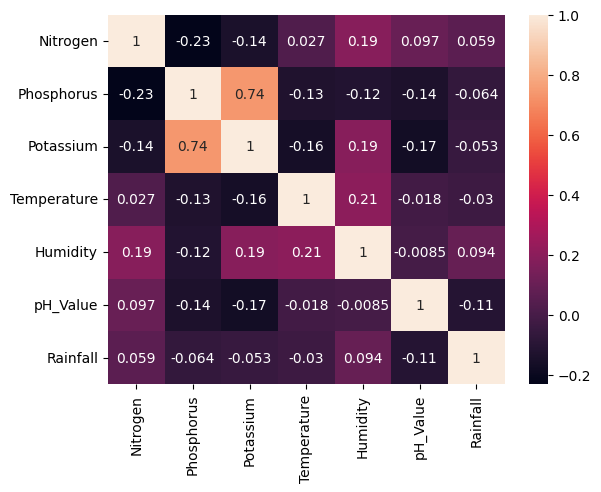

In [12]:
sns.heatmap(corr, annot=True)

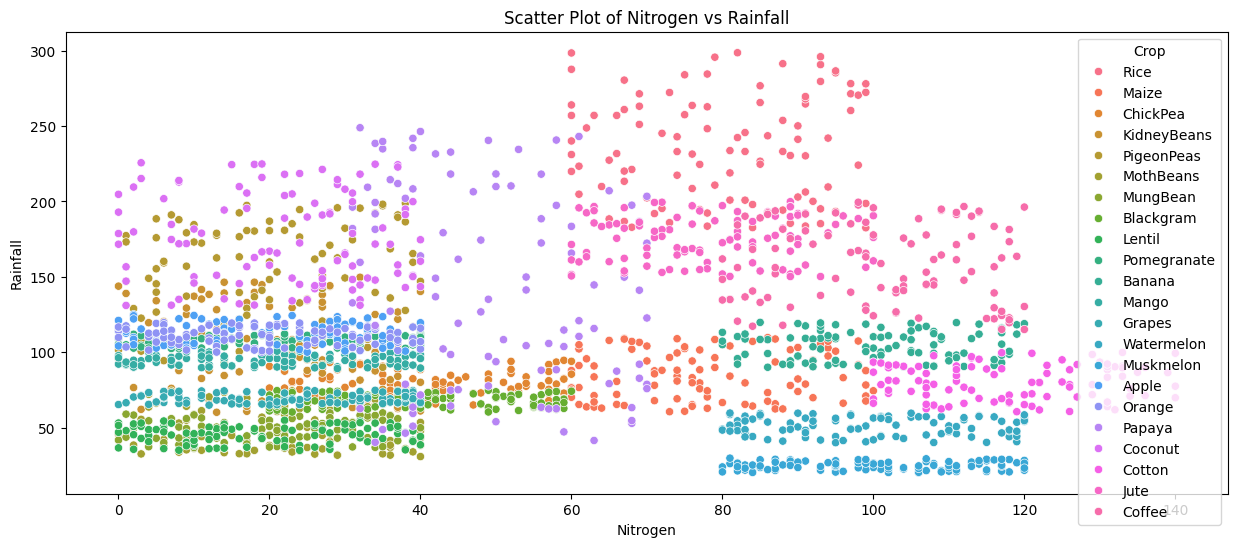

In [16]:
#Scatter plots to explore individual relationships
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Nitrogen', y='Rainfall', hue='Crop', data=df)
plt.title("Scatter Plot of Nitrogen vs Rainfall")
plt.show()

In [18]:
px.bar(df,x='Crop',y='Rainfall', color='Crop')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Crop=%{x}<br>Rainfall=%{y}<extra></extra>',
              'legendgroup': 'Rice',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'Rice',
              'offsetgroup': 'Rice',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice',
                          'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice',
                          'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice',
                          'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice',
                          'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice',
                          'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice',
                          'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice',
                          'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice',
                          'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice',
                          'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice',
                          'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice',
                          'Rice'], dtype=object),
              'xaxis': 'x',
              'y': array([202.9355362, 226.6555374, 263.9642476, 242.8640342, 262.7173405,
                          251.0549998, 271.3248604, 241.9741949, 230.4462359, 221.2091958,
                          264.6148697, 250.0832336, 284.4364567, 185.2773389, 209.5869708,
                          231.0863347, 276.6552459, 206.2611855, 224.5550169, 291.2986618,
                          185.4974732, 231.3843163, 213.3560921, 233.1075816, 224.0581164,
                          257.0038865, 271.3586137, 260.2634026, 240.0810647, 197.9791215,
                          272.2017204, 200.0882787, 224.6757231, 270.4417274, 233.1321372,
                          193.3473987, 272.2999056, 285.2493645, 298.4018471, 257.0343554,
                          248.7183228, 209.9001977, 200.834898 , 298.5601175, 265.5355937,
                          183.6793207, 196.9560008, 233.0453455, 210.8142087, 253.7202781,
                          219.9048349, 208.5810155, 195.0948311, 227.3637009, 286.5083725,
                          283.9338466, 217.3788583, 267.9761948, 191.9535738, 277.9626192,
                          245.1511304, 245.6626799, 279.5451717, 202.3838319, 263.6372176,
                          182.5616319, 198.6730942, 243.5120414, 263.1103304, 269.5039162,
                          204.8001847, 260.8875056, 295.6094492, 192.3197536, 257.4914906,
                          278.0791793, 280.4044392, 185.9461429, 194.5766559, 200.9133156,
                          182.9043504, 195.3574542, 223.3671883, 186.7536773, 220.1156708,
                          231.7364957, 242.3170629, 182.6549356, 233.7034975, 230.2242223,
                          290.6793783, 241.2013513, 218.9163567, 248.2256491, 256.9964761,
                          194.2651719, 295.9248796, 287.5766935, 183.6222657, 188.413665 ]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Crop=%{x}<br>Rainfall=%{y}<extra></extra>',
              'legendgroup': 'Maize',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'Maize',
              'offsetgroup': 'Maize',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Maize', 'Maize', 'Maize', 'Maize', 'Maize', 'Maize', 'Maize', 'Maize',
                          'Ma

In [19]:
px.scatter_3d(df,x='Temperature', y='Humidity', z='pH_Value', color='Crop')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Crop=Rice<br>Temperature=%{x}<br>Humidity=%{y}<br>pH_Value=%{z}<extra></extra>',
              'legendgroup': 'Rice',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Rice',
              'scene': 'scene',
              'showlegend': True,
              'type': 'scatter3d',
              'x': array([20.87974371, 21.77046169, 23.00445915, 26.49109635, 20.13017482,
                          23.05804872, 22.70883798, 20.27774362, 24.51588066, 23.22397386,
                          26.52723513, 23.97898217, 26.80079604, 24.01497622, 25.66585205,
                          24.28209415, 21.58711777, 23.79391957, 21.8652524 , 23.57943626,
                          21.32504158, 25.15745531, 21.94766735, 21.0525355 , 23.48381344,
                          25.0756354 , 26.35927159, 24.52922681, 20.77576147, 22.30157427,
                          21.44653958, 22.17931888, 24.52783742, 20.26707606, 25.7354293 ,
                          26.79533926, 26.75754171, 23.86330467, 21.01944696, 24.17298839,
                          22.78133816, 25.62980105, 25.59704938, 23.83067496, 26.31355498,
                          24.8972823 , 24.958779  , 23.24113501, 21.66628296, 24.63544858,
                          23.43121862, 20.0454142 , 23.85724032, 21.97199397, 26.22916897,
                          23.44676801, 25.65553461, 24.44345477, 20.2801937 , 21.7238313 ,
                          20.41447029, 25.75528612, 20.61521424, 21.84106875, 20.08369642,
                          24.45802087, 21.14347496, 25.78720567, 23.64124821, 23.43191632,
                          24.97669518, 22.72791041, 24.87300744, 21.32376327, 26.29465461,
                          22.2286982 , 26.73072391, 24.88921174, 26.88444878, 22.67846116,
                          26.08867875, 25.42977518, 26.40323239, 26.04371967, 25.2827223 ,
                          22.08576562, 23.28617173, 25.48591986, 23.67575393, 20.82477109,
                          26.92995077, 23.83509503, 26.52872817, 26.46428311, 22.69657794,
                          22.68319059, 21.53346343, 21.40865769, 26.54348085, 23.35905428]),
              'y': array([82.00274423, 80.31964408, 82.3207629 , 80.15836264, 81.60487287,
                          83.37011772, 82.63941394, 82.89408619, 83.5352163 , 83.03322691,
                          81.41753846, 81.45061596, 80.88684822, 82.05687182, 80.66385045,
                          80.30025587, 82.7883708 , 80.41817957, 80.1923008 , 83.58760316,
                          80.47476396, 83.11713476, 80.97384195, 82.67839517, 81.33265073,
                          80.52389148, 84.04403589, 80.54498576, 84.49774397, 80.64416466,
                          84.94375962, 80.33127223, 82.73685569, 81.63895217, 83.88266234,
                          82.1480873 , 81.17734011, 83.15250801, 82.95221726, 83.7287574 ,
                          82.06719137, 83.52842314, 80.14509262, 84.81360127, 82.36698992,
                          80.52586088, 84.47963372, 84.59201843, 80.70960551, 80.41363018,
                          83.06310136, 80.3477562 , 82.22572988, 81.89918197, 83.83625819,
                          84.79352417, 83.47021081, 82.45432595, 82.1235421 , 80.2389895 ,
                          82.20802629, 83.51827127, 83.77345559, 80.72886384, 83.29114712,
                          82.74835604, 80.33502926, 82.11124033, 80.28597873, 80.56887849,
                          83.891805  , 82.1706881 , 82.84022551, 83.00320459, 84.56919326,
                          81.85872947, 81.78596776, 81.97927117, 81.46033732, 83.72874389,
                          80.37979919, 82.94682591, 81.05635517, 84.96907151, 80.54372813,
                          83.47038318, 81.43321641, 81.40633547, 81.03569343, 84.1341879 ,
                          81.91411159, 83.88387074, 80.12267476, 83.85642678, 82.81088865,
                          83.46358271, 82.14004101, 83.32931

## Data preprocessing

In [20]:
encoder = LabelEncoder()
df['Crop'] = encoder.fit_transform(df['Crop'])

In [21]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


## Split the dataset into training and test sets

In [22]:
x = df.drop(['Crop'], axis=1)
y = df[['Crop']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

## Modelling

In [23]:
model=Sequential()
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(22, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=100,verbose=1)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1135 - loss: 3.1530 - val_accuracy: 0.2182 - val_loss: 2.4099
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4404 - loss: 2.0232 - val_accuracy: 0.5432 - val_loss: 1.7277
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7744 - loss: 1.4198 - val_accuracy: 0.5773 - val_loss: 1.5457
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8907 - loss: 1.0389 - val_accuracy: 0.7727 - val_loss: 1.2568
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9360 - loss: 0.7558 - val_accuracy: 0.8500 - val_loss: 0.9962
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9476 - loss: 0.5604 - val_accuracy: 0.8545 - val_loss: 0.8984
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9478 - loss: 0.4702 - val_accuracy: 0.9091 - val_loss: 0.6111
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9558 - loss: 0.3680 - val_accuracy: 0.9273 - v

In [25]:
loss,accuracy=model.evaluate(x_test,y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9747 - loss: 0.0626


## Evaluation

In [26]:
accuracy

0.9772727489471436

In [27]:
tahmin=model.predict(x_test)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [28]:
model.save('model.keras')

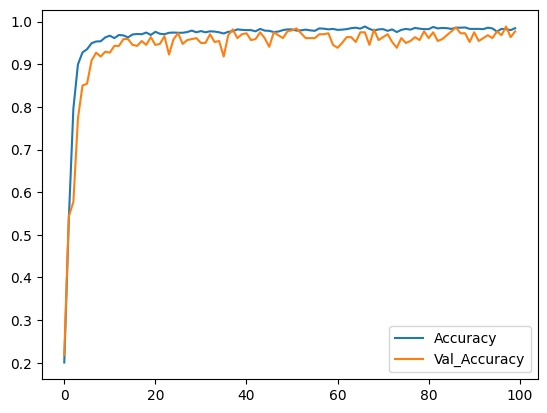

In [29]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

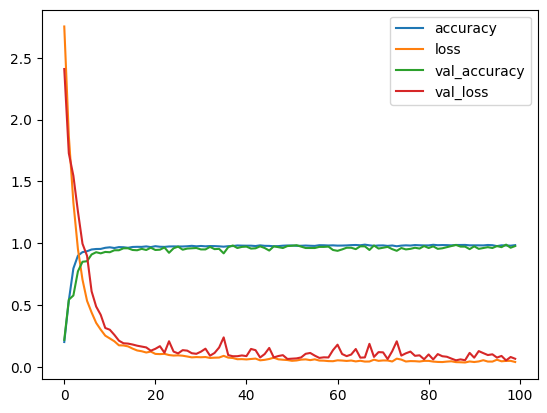

In [30]:
loss_f=pd.DataFrame(history.history)
loss_f.plot();

In [31]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 19,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,

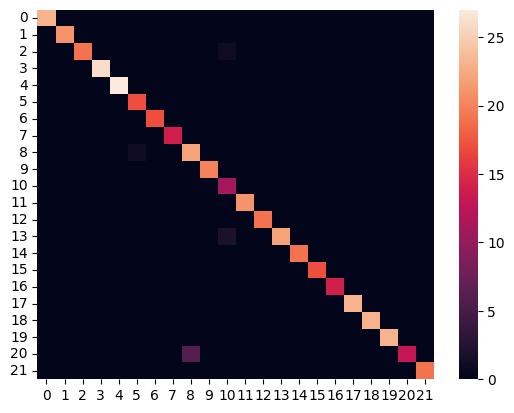

In [33]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [34]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.79      0.96      0.86        23
           9       1.00      1.00      1.00        20
          10       0.79      1.00      0.88        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    